<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S2_ProjetSpeedDating_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
speedDatingData = pd.read_csv('/content/drive/My Drive/Speed_Dating_Data.csv',engine='python')
speedDatingData.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


# Data prepocessing

On supprime les colonnes ID, ainsi que toute les colonnes qui n'ont pas au moins 7500 valeurs non nulles

In [18]:
speedDatingData_sliced = speedDatingData.dropna(axis = 1, thresh = 7500)
speedDatingData_sliced = speedDatingData_sliced.drop(["iid", "id", "wave", "pid", "idg"], axis= 1)
speedDatingData_sliced.head()

,gender,condtn,round,position,order,partner,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,...,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,0,1,10,7,4,1,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,...,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,0,1,10,7,3,2,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,...,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,0,1,10,7,10,3,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,...,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,NaN,1.0
3,0,1,10,7,5,4,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,...,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,0,1,10,7,7,5,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,...,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0


On remplace les valeurs nulles restantes par la médiane

In [19]:
speedDatingData_sliced = speedDatingData_sliced.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x.fillna('.'))
speedDatingData_sliced.isnull().sum().max()

0

Il reste des colonnes non numériques, nous avons décidé de les écarter parce que les valeurs présentes dans ces colonnes sont trop variées.la colonne "career" se trouve sous une forme de code dans la colonne "career_c" 

In [0]:
#Nettoyage de données type Object
#speedDatingData_sliced.select_dtypes(include='object')
speedDatingData_sliced= speedDatingData_sliced.drop("field", axis =1)
speedDatingData_sliced= speedDatingData_sliced.drop("from", axis =1) 
speedDatingData_sliced= speedDatingData_sliced.drop("career", axis =1) 


In [21]:
speedDatingData_sliced.head()

,gender,condtn,round,position,order,partner,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,0,1,10,7,4,1,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,7.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,0,1,10,7,3,2,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,8.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,0,1,10,7,10,3,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,5.0,1.0
3,0,1,10,7,5,4,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,7.0,7.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,0,1,10,7,7,5,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,8.0,6.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0


Contruction de la matrice de corrélation

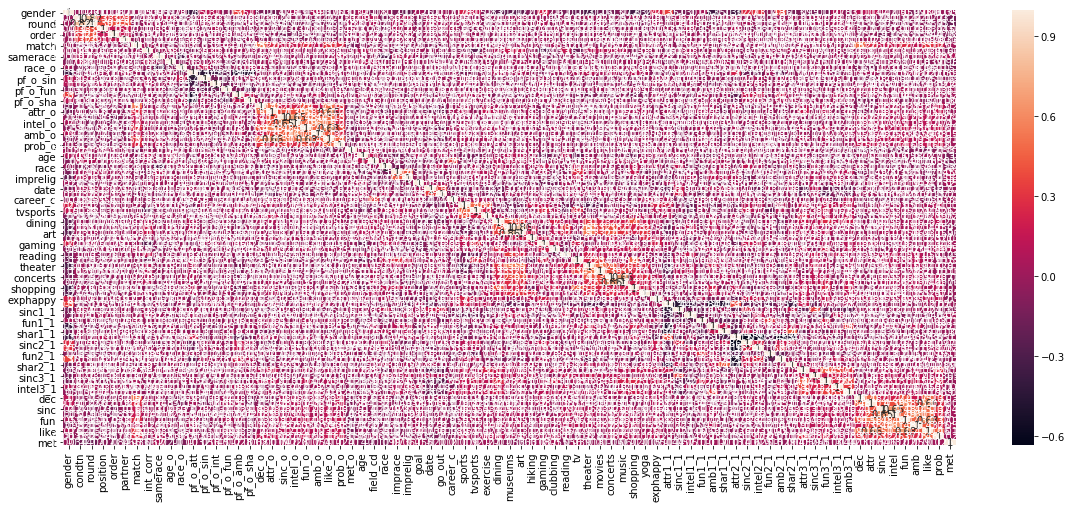

In [22]:
corr = speedDatingData_sliced.corr()
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr, annot=True, ax=ax)

Comme cette matrice est illisible et ne permet pas de dégager des idées claires sur les données, nous avons décidé de supprimer les combinaisons qui représentent un taux de corrélation de moins que 0.5

In [23]:
#isoler les colonnes qui ont une correlation d'au moins 0.5
indices = np.where(corr.abs() > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('condtn', 'round'),
 ('match', 'dec_o'),
 ('match', 'dec'),
 ('dec_o', 'like_o'),
 ('attr_o', 'fun_o'),
 ('attr_o', 'like_o'),
 ('sinc_o', 'intel_o'),
 ('sinc_o', 'like_o'),
 ('intel_o', 'amb_o'),
 ('intel_o', 'like_o'),
 ('fun_o', 'like_o'),
 ('museums', 'art'),
 ('museums', 'theater'),
 ('art', 'theater'),
 ('theater', 'movies'),
 ('concerts', 'music'),
 ('attr2_1', 'sinc2_1'),
 ('attr2_1', 'intel2_1'),
 ('attr2_1', 'amb2_1'),
 ('dec', 'like'),
 ('attr', 'fun'),
 ('attr', 'like'),
 ('sinc', 'intel'),
 ('sinc', 'like'),
 ('intel', 'amb'),
 ('intel', 'like'),
 ('fun', 'like')]

On voit les couples de colonnes qui ont une forte corrélation. On les extrait sous forme de liste. En ajoute en plus la colonne gender même si elle ne fait pas partie de la liste, pour pouvoir grouper les données par genre.

In [24]:
indices = [item for t in indices for item in t]
s = []
for i in indices:
       if i not in s:
          s.append(i)
s.append("gender")
print(indices)
print(s)

['condtn', 'round', 'match', 'dec_o', 'match', 'dec', 'dec_o', 'like_o', 'attr_o', 'fun_o', 'attr_o', 'like_o', 'sinc_o', 'intel_o', 'sinc_o', 'like_o', 'intel_o', 'amb_o', 'intel_o', 'like_o', 'fun_o', 'like_o', 'museums', 'art', 'museums', 'theater', 'art', 'theater', 'theater', 'movies', 'concerts', 'music', 'attr2_1', 'sinc2_1', 'attr2_1', 'intel2_1', 'attr2_1', 'amb2_1', 'dec', 'like', 'attr', 'fun', 'attr', 'like', 'sinc', 'intel', 'sinc', 'like', 'intel', 'amb', 'intel', 'like', 'fun', 'like']
['condtn', 'round', 'match', 'dec_o', 'dec', 'like_o', 'attr_o', 'fun_o', 'sinc_o', 'intel_o', 'amb_o', 'museums', 'art', 'theater', 'movies', 'concerts', 'music', 'attr2_1', 'sinc2_1', 'intel2_1', 'amb2_1', 'like', 'attr', 'fun', 'sinc', 'intel', 'amb', 'gender']


In [25]:
#Ne garder que les colonnes sélectionnées ci-dessus
speedDatingData_sliced = speedDatingData_sliced[s]
speedDatingData_sliced.head()

,condtn,round,match,dec_o,dec,like_o,attr_o,fun_o,sinc_o,intel_o,amb_o,museums,art,theater,movies,concerts,music,attr2_1,sinc2_1,intel2_1,amb2_1,like,attr,fun,sinc,intel,amb,gender
0,1,10,0,0,1,7.0,6.0,8.0,8.0,8.0,8.0,1.0,1.0,1.0,10.0,10.0,9.0,35.0,20.0,15.0,5.0,7.0,6.0,7.0,9.0,7.0,6.0,0
1,1,10,0,0,1,8.0,7.0,7.0,8.0,10.0,7.0,1.0,1.0,1.0,10.0,10.0,9.0,35.0,20.0,15.0,5.0,7.0,7.0,8.0,8.0,7.0,5.0,0
2,1,10,1,1,1,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,1.0,10.0,10.0,9.0,35.0,20.0,15.0,5.0,7.0,5.0,8.0,8.0,9.0,5.0,0
3,1,10,1,1,1,7.0,7.0,8.0,8.0,9.0,9.0,1.0,1.0,1.0,10.0,10.0,9.0,35.0,20.0,15.0,5.0,7.0,7.0,7.0,6.0,8.0,6.0,0
4,1,10,1,1,1,8.0,8.0,6.0,7.0,9.0,9.0,1.0,1.0,1.0,10.0,10.0,9.0,35.0,20.0,15.0,5.0,6.0,5.0,7.0,6.0,7.0,6.0,0


A partir des données nettoyées, on crée la matrice de corrélation pour les hommes.

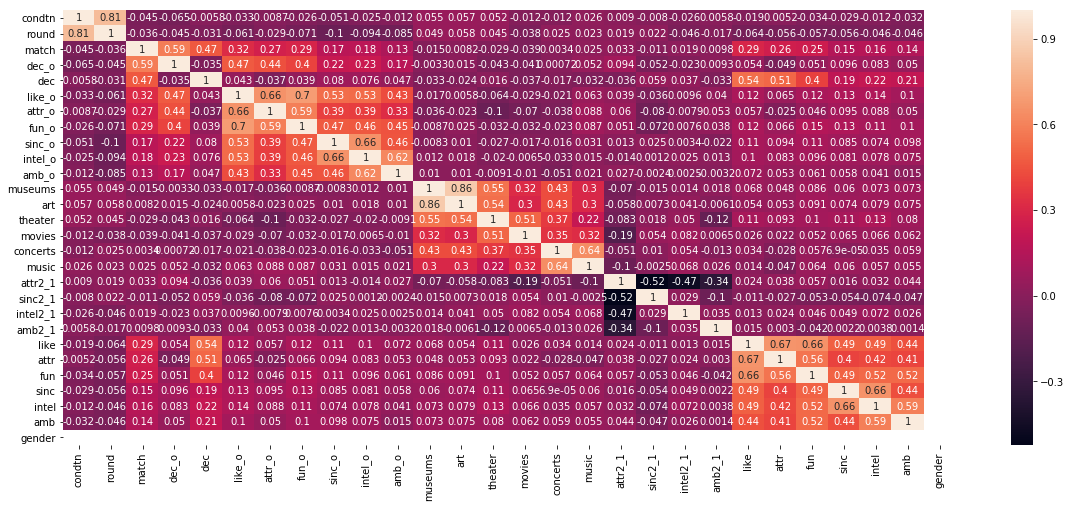

In [26]:
#corr = speedDatingData_sliced.corr()
#corr= speedDatingData_sliced.corr().abs()

# Select upper triangle of correlation matrix
#upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
#speedDatingData_sliced.drop(speedDatingData_sliced.columns[to_drop], axis=1)

corrM= speedDatingData_sliced[speedDatingData_sliced.gender == 1].corr()

f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corrM, annot=True, ax=ax)

On voit déjà un peu mieux les corrélation entre certain critères.
On crée un diagramme pour mieux visualiser le résultat.

/usr/local/lib/python3.6/dist-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


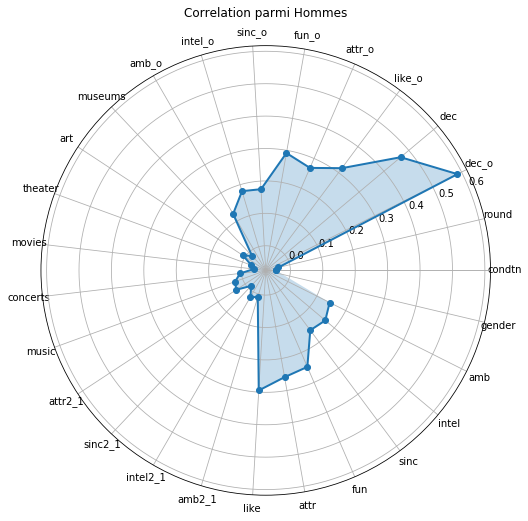

In [27]:
labels=corrM.columns.drop('match')
stats=corrM.loc["match",labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig= plt.figure()
fig.set_size_inches(11.7, 8.27)
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Correlation parmi Hommes")
ax.grid(True)


On fait le même traitement pour les femmes

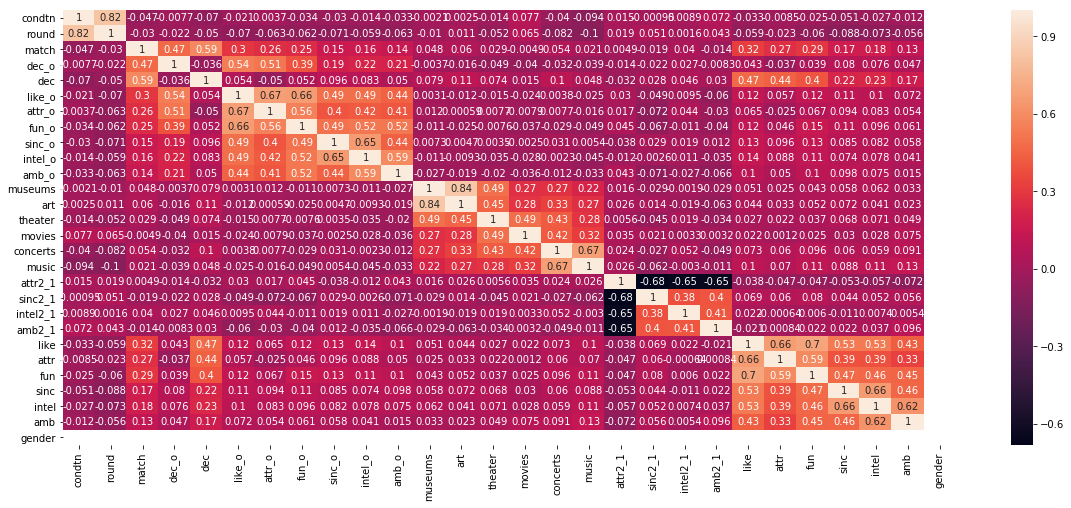

In [28]:
corrF= speedDatingData_sliced[speedDatingData_sliced.gender == 0].corr()

f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corrF, annot=True, ax=ax)

/usr/local/lib/python3.6/dist-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


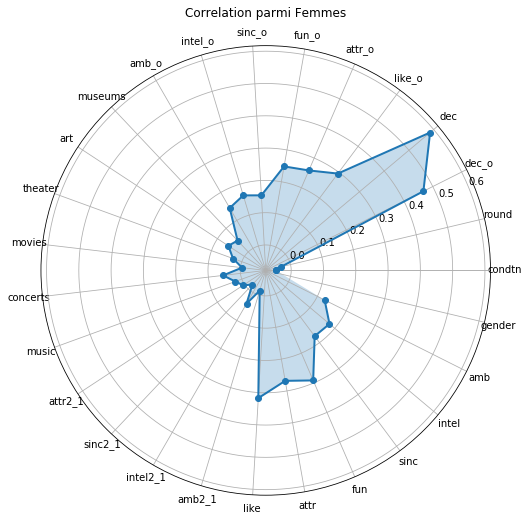

In [29]:
labels=corrF.columns.drop('match')
stats=corrF.loc["match",labels].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig= plt.figure()
fig.set_size_inches(11.7, 8.27)
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Correlation parmi Femmes")
ax.grid(True)